# MLP from scratch

This project is done by Mohammed Ali El Adlouni and is part of the Deep Learning course in the Master's program MALIA at Université Lyon 2.

In this project, the goal is to write the entire backpropagation algorithm from scratch using only Numerical Python package (numpy) and implement a simple multilayer perceptron (MLP). This will involve developing the necessary components for forward propagation, loss computation, and backpropagation to update the network's weights and biases effectively. We will also study the effect of some hyperparameters (learning rate, choice of activation function, etc) on the performance score and the elapsed time.

## Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from model import *
from utils import *

## Logic gates datasets

In [2]:
X_AND = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_AND = np.array([[0], [0], [0], [1]])

X_OR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_OR = np.array([[0], [1], [1], [1]])

X_XOR = np.array([[0,0], [0,1], [1,0], [1,1]])
y_XOR = np.array([[0], [0], [0], [1]])

X = X_XOR
y = y_XOR


## Training the neural network

In [7]:
nn = NeuralNetwork([2, 3, 1], activation_fct='leaky_relu', learning_rate=0.01, loss_treshold=0.01, max_iteration=5000)

losses = nn.train(X, y, return_loss='True')
print(f'train loss = {losses[-1]}')

test_loss, y_pred = nn.test(X, y, return_loss='True')
print(f'test loss: ', test_loss)

print(f'y_pred =', y_pred)
plot_training_loss(losses)

Epoch 0 : loss = 0.25640578275502984
train loss = 0.009956105225306294
test loss:  0.009728293645851703
y_pred = [[-1.25079894e-03  2.39237344e-01 -3.92224860e-05  8.56506877e-01]]


AttributeError: 'list' object has no attribute 'items'

<Figure size 1000x600 with 0 Axes>

## Hyperparameter tuning (activation function)

Epoch 0 : loss = 0.12626040773841626
Epoch 100 : loss = 0.09771955485379956
Epoch 200 : loss = 0.08934314673250707
Epoch 300 : loss = 0.08486114153349439
Epoch 400 : loss = 0.08160899254819311
Epoch 500 : loss = 0.0789540664290985
Epoch 600 : loss = 0.07663170211581123
Epoch 700 : loss = 0.07449495013608837
Epoch 800 : loss = 0.07245951930853145
Epoch 900 : loss = 0.07047979073958317
Epoch 1000 : loss = 0.06853365542578724
Epoch 1100 : loss = 0.06661208894901013
Epoch 1200 : loss = 0.06471214041974176
Epoch 1300 : loss = 0.0628326380542273
Epoch 1400 : loss = 0.06097198552746805
Epoch 1500 : loss = 0.05912739273738296
Epoch 1600 : loss = 0.05729494435140224
Epoch 1700 : loss = 0.05547005807325846
Epoch 1800 : loss = 0.05364804992497217
Epoch 1900 : loss = 0.051824654073376164
Epoch 2000 : loss = 0.049996427200476534
Epoch 2100 : loss = 0.04816101259885191
Epoch 2200 : loss = 0.0463172628134168
Epoch 2300 : loss = 0.044465233685622996
Epoch 2400 : loss = 0.04260607319354587
Epoch 2500 :

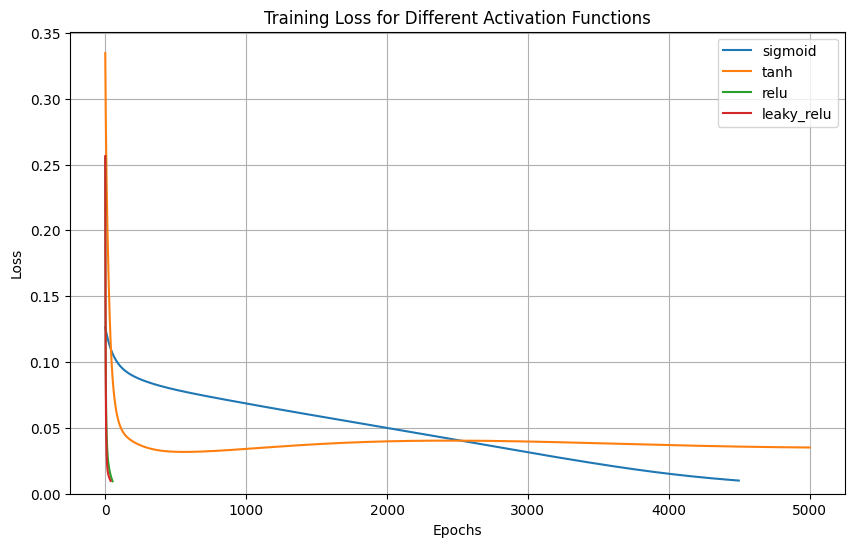

In [8]:
activation_functions = ['sigmoid', 'tanh', 'relu', 'leaky_relu']
losses_dict = {}

for activation in activation_functions:
    # Initialize the neural network with the current activation function
    nn = NeuralNetwork([2, 3, 1], activation_fct=activation, learning_rate=0.01, loss_treshold=0.01, max_iteration=5000)

    # Train the network and store the losses
    losses = nn.train(X, y, return_loss='True')
    losses_dict[activation] = losses  # Store losses in a dictionary

    # Print train loss and test results
    print(f'Training with {activation} activation function:')
    print(f'Train loss = {losses[-1]}')
    test_loss, y_pred = nn.test(X, y, return_loss='True')
    print(f'Test loss: ', test_loss)
    print(f'y_pred =', y_pred)


# Use the function to plot the training losses
plot_training_loss(losses_dict)


In [9]:
# List of activation functions to test
activation_functions = ['sigmoid', 'tanh', 'relu', 'leaky_relu']

# Dictionary to store predictions for each activation function
predictions = {}

for activation in activation_functions:
    # Initialize the neural network
    nn = NeuralNetwork([2, 3, 1], activation_fct=activation, learning_rate=0.01, loss_treshold=0.01, max_iteration=5000)

    # Train the neural network
    losses = nn.train(X_XOR, y_XOR, return_loss='True')
    print(f'Train loss for {activation}: {losses[-1]}')

    # Test the neural network
    test_loss, y_pred = nn.test(X_XOR, y_XOR, return_loss='True')
    print(f'Test loss for {activation}: {test_loss}')

    # Store predictions in the dictionary
    predictions[activation] = y_pred.flatten()  # Flatten to 1D for easier printing

# Print predictions for each activation function
for activation, pred in predictions.items():
    print(f'y_pred for {activation}: {pred}')


Epoch 0 : loss = 0.12626040773841626
Epoch 100 : loss = 0.09771955485379956
Epoch 200 : loss = 0.08934314673250707
Epoch 300 : loss = 0.08486114153349439
Epoch 400 : loss = 0.08160899254819311
Epoch 500 : loss = 0.0789540664290985
Epoch 600 : loss = 0.07663170211581123
Epoch 700 : loss = 0.07449495013608837
Epoch 800 : loss = 0.07245951930853145
Epoch 900 : loss = 0.07047979073958317
Epoch 1000 : loss = 0.06853365542578724
Epoch 1100 : loss = 0.06661208894901013
Epoch 1200 : loss = 0.06471214041974176
Epoch 1300 : loss = 0.0628326380542273
Epoch 1400 : loss = 0.06097198552746805
Epoch 1500 : loss = 0.05912739273738296
Epoch 1600 : loss = 0.05729494435140224
Epoch 1700 : loss = 0.05547005807325846
Epoch 1800 : loss = 0.05364804992497217
Epoch 1900 : loss = 0.051824654073376164
Epoch 2000 : loss = 0.049996427200476534
Epoch 2100 : loss = 0.04816101259885191
Epoch 2200 : loss = 0.0463172628134168
Epoch 2300 : loss = 0.044465233685622996
Epoch 2400 : loss = 0.04260607319354587
Epoch 2500 :

In [10]:
print(predictions)

{'sigmoid': array([0.00697556, 0.11783024, 0.0764315 , 0.75473599]), 'tanh': array([-0.20314782,  0.23721746,  0.22279495,  0.63439697]), 'relu': array([0.        , 0.26133745, 0.        , 0.91461592]), 'leaky_relu': array([-1.25079894e-03,  2.39237344e-01, -3.92224860e-05,  8.56506877e-01])}


In [11]:
print("Shape of y:", y.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of y: (4, 1)
Shape of y_pred: (1, 4)


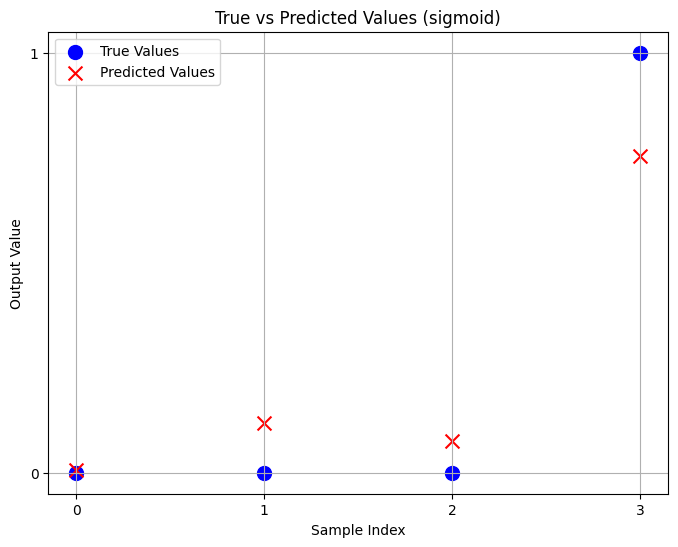

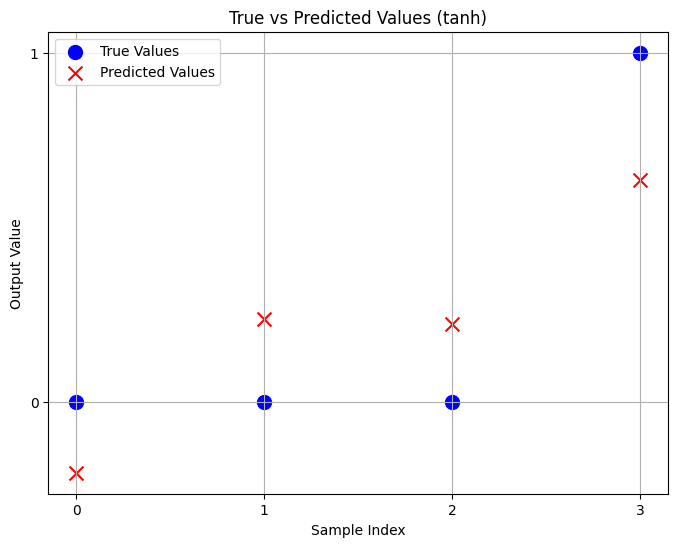

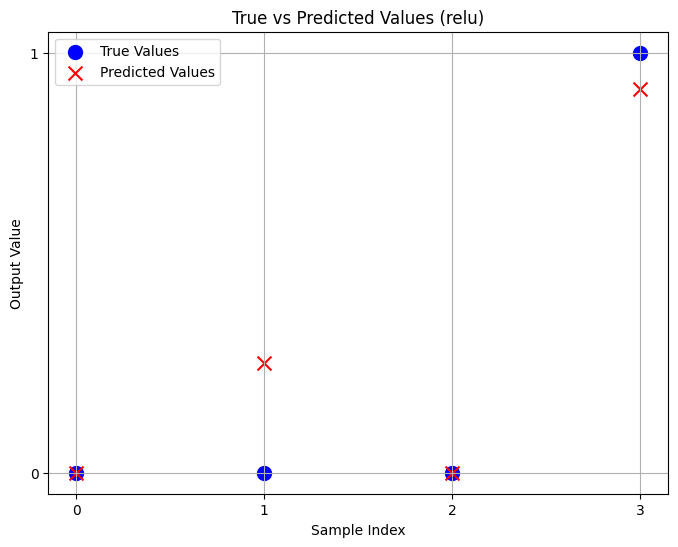

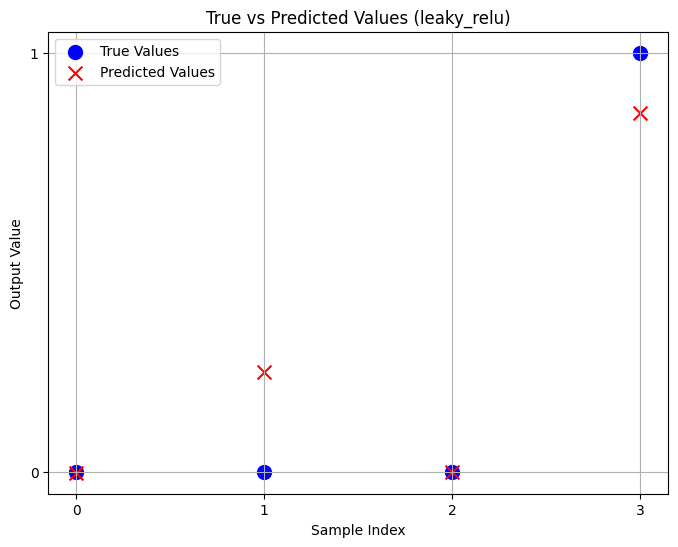

In [12]:

for activation, y_pred in predictions.items():
    plot_predictions(y, y_pred.T, activation)


weights[1].T.shape: (10, 1)
dj_dz[1].shape: (1, 4)
z[1].shape: (1, 4)
dj_dz[0].shape before assignment: (10, 2)
self.z[0].shape : (10, 4)
self.z[1].shape : (1, 4)
(10, 4)
(10, 4)
Epoch 0 : loss = 0.07795014500439576
weights[1].T.shape: (10, 1)
dj_dz[1].shape: (1, 4)
z[1].shape: (1, 4)
dj_dz[0].shape before assignment: (10, 4)
self.z[0].shape : (10, 4)
self.z[1].shape : (1, 4)
(10, 4)
(10, 4)
weights[1].T.shape: (10, 1)
dj_dz[1].shape: (1, 4)
z[1].shape: (1, 4)
dj_dz[0].shape before assignment: (10, 4)
self.z[0].shape : (10, 4)
self.z[1].shape : (1, 4)
(10, 4)
(10, 4)
weights[1].T.shape: (10, 1)
dj_dz[1].shape: (1, 4)
z[1].shape: (1, 4)
dj_dz[0].shape before assignment: (10, 4)
self.z[0].shape : (10, 4)
self.z[1].shape : (1, 4)
(10, 4)
(10, 4)
weights[1].T.shape: (10, 1)
dj_dz[1].shape: (1, 4)
z[1].shape: (1, 4)
dj_dz[0].shape before assignment: (10, 4)
self.z[0].shape : (10, 4)
self.z[1].shape : (1, 4)
(10, 4)
(10, 4)
weights[1].T.shape: (10, 1)
dj_dz[1].shape: (1, 4)
z[1].shape: (1, 4

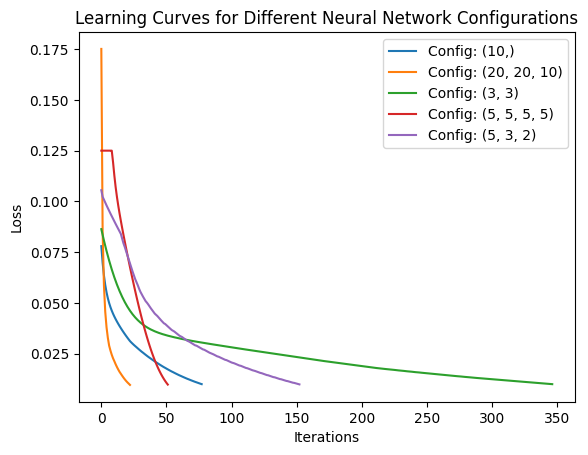

In [13]:
# Define ranges for the number of neurons and hidden layers
hidden_layer_configs = [(10,), (20, 20, 10), (3, 3), (5, 5, 5, 5), (5, 3, 2)]  

# Dictionary to store losses for each configuration
losses_dict = {}

for config in hidden_layer_configs:
    # Initialize the neural network with the current configuration
    nn = NeuralNetwork([2] + list(config) + [1], activation_fct='relu', learning_rate=0.01, loss_treshold=0.01, max_iteration=5000)

    # Train the neural network
    losses = nn.train(X_XOR, y_XOR, return_loss='True')
    print(f'Train loss for configuration {config}: {losses[-1]}')

    # Store losses for plotting
    losses_dict[config] = losses

# Plot learning curves for each configuration
for config, losses in losses_dict.items():
    plt.plot(losses, label=f'Config: {config}')

plt.title('Learning Curves for Different Neural Network Configurations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
